# Predicting the count of total rental bikes using LASSO
### Group 24
Jialu Jin (24403594)
<br> Camila Dall Bello (21427414)
<br> Julian Widjaja (73873796)
<br> yanxin Liang (50798412)

In [1]:
#Loading libraries

library(dplyr)
library(tidymodels)
library(mltools)
library(leaps)
library(glmnet)
library(GGally)
library(car)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tibble       3.2.1
✔ ggplot2      3.4.3     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/


Attaching package: ‘mltools’


The following obje

# Introduction
## Bike Sharing Dataset:
Here are two CSV files in the link below, one called day.csv, and the other called hour.csv. 
<br>We will be **using only day.csv file**; thus, we will only provide the dataset description and questions focusing on this dataset.
- Link: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
- There are 731 observations and 16 variables in our dataset.
- Description of the 16 variables:
    - instant (numerical): record index 
    - dteday (date): date
    - season (categorical): season (1:springer, 2:summer, 3:fall, 4:winter)
    - yr (categorical): year (0: 2011, 1:2012)
    - mnth (categorical): month ( 1 to 12)
    - holiday (categorical): weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    - weekday (categorical): day of the week
    - workingday (categorical): if day is neither weekend nor holiday is 1, otherwise is 0.
    - weathersit (categorical): 
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    - temp (numerical): Normalized temperature in Celsius. The values are divided to 41 (max)
    - atemp (numerical): Normalized feeling temperature in Celsius. The values are divided to 50 (max)
    - hum (numerical): Normalized humidity. The values are divided to 100 (max)
    - windspeed (numerical): Normalized wind speed. The values are divided to 67 (max)
    - casual (numerical): count of casual users
    - registered (numerical): count of registered users
    - cnt (numerical): count of total rental bikes including both casual and registered

**Dataset Information:** Bike-sharing systems automate the entire process, from membership to rental and return, allowing users to easily rent a bike from one location and return it at another. There are over 500 such programs globally, with 500,000+ bicycles, garnering interest for their impact on traffic, the environment, and health. Unlike other transportation services, bike-sharing records travel duration and locations, creating a virtual sensor network for city mobility monitoring. This data can be used to detect and analyze important urban events.

**Data gathering:** The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. The data was aggregated on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

## Question:

- **Reasoning:** Different pieces of literature have worked on understanding how weather and environmental conditions model bike usage and demand. Ashqar, et al. (2019) quantified the effect of weather conditions on the prediction of bike station counts in the San Francisco Bay Area Bike Share System. This study concluded that  bike counts changed with the month-of-the-year, day-of-the-week, time-of-the-day, and some weather variables. Similarly, Pazdan, S et al.(2021) studied such effects in the city of Cracow (Poland). The research results clearly indicate that weather conditions affect both BSS users and the broader population of cyclists, taking into account the attitudes of cyclists and considering differences between holidays and working days.

Our main interest would be to able to predict the bike count users in Washington D.C. based on the relationship between weather, environmental and season conditions.

**Question:**
- What is the expected count of total rental bikes given relevant environmental/seasonal variables?
- Response variable: count of total rental bikes including both casual and registered (cnt)

**Describe clearly how the data will help you address the question of interest:** Many variables like temp, atemp, hum, windspeed, and season, etc can be used as explanatory variables in the regression model, then the regression model can be used to make the prediction.
      
**Explain whether your question is focused on prediction, inference, or both:**
The question revolves around predicting total user counts using temperature, humidity, and wind speed, primarily employing regression analysis. The dataset's variables, including total users and weather-related data, enable regression modeling. Historical data is utilized to establish patterns and build regression models, with model accuracy assessed through metrics like MAE or RMSE. Additionally, insights from this prediction may indirectly inform the impact of weather conditions on registered users, making it a valuable dual-purpose analysis with a regression-based approach.

**Relevance**: Predicting total user counts based on weather factors is crucial for optimizing bike-sharing services. Accurate predictions aid resource allocation, enhance user experiences, and influence marketing and safety measures. Understanding how weather conditions affect registered users provides valuable market insights and a competitive edge.

# Exploratory Data Analysis (EDA)
### Demonstrate that the dataset can be read from the web into R
- We have created a Github repository for our group use and uploaded the dataset. It can now be read from the repository into R.

In [2]:
day <- read.csv("https://raw.githubusercontent.com/JialuJin/STAT_301_Project/main/day.csv")
head(day)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


### Clean and wrangle the data into a tidy format
- The data is already in a tidy format
    - Each variable forms a column
    - Each observation forms a row
    - The dataset includes variable names
- But we can still clean our data by dropping the redundant columns
    - Since our response variable is cnt (count of total rental bikes) which is the sum of `casual` and `registered` columns, we can drop these two columns.
    - Since `instant` is unique for each row of observation, it is also redundant for my task, we can drop this column as well.

In [3]:
day <- day %>% select(-casual, -registered, -instant)

### A visualization that is relevant to explore the data
- We chose to explore the relationship between the count of total rental bikes and the date.

In [4]:
data_type <- class(day$dteday)
print(data_type)

[1] "character"


- Convert the dteday column into Date type.

In [5]:
day$dteday <- as.Date(day$dteday)
# Verify the data type conversion
str(day)

'data.frame':	731 obs. of  13 variables:
 $ dteday    : Date, format: "2011-01-01" "2011-01-02" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


- Use a line plot to visualize the relationship between  the count of total rental bikes and the date (cnt & dteday)

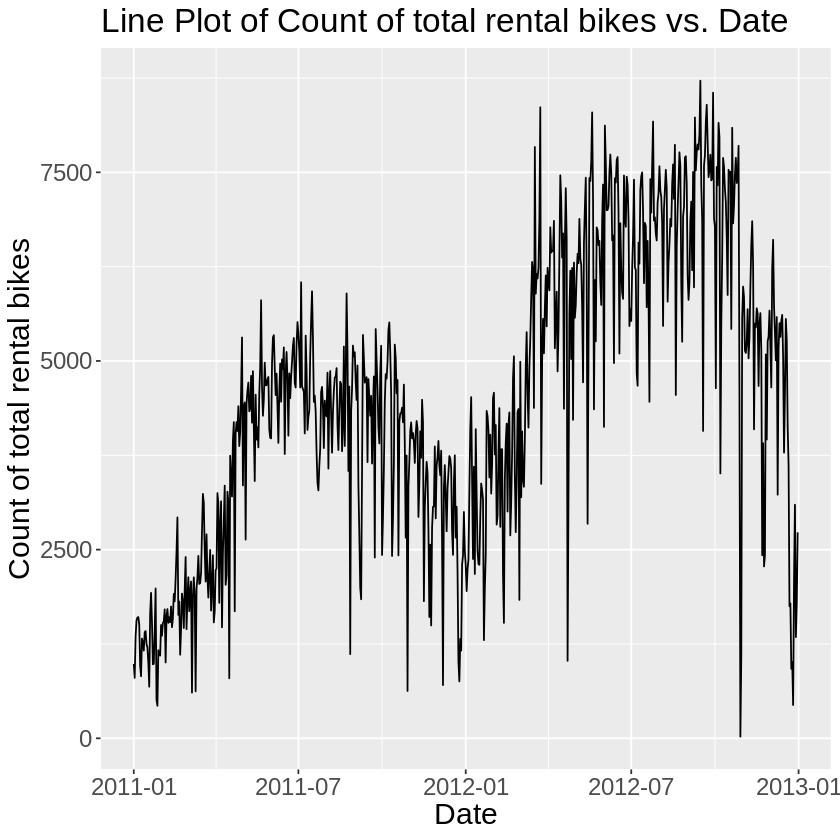

In [6]:
library(ggplot2)

ggplot(data = day, aes(x = dteday, y = cnt)) +
    geom_line() +
    labs(x = "Date", y = "Count of total rental bikes", title = "Line Plot of Count of total rental bikes vs. Date") + 
    theme(
        text = element_text(size = 18),  # Adjust the text size here
        plot.title = element_text(size = 20),  # Modify the title text size
        axis.title.x = element_text(size = 18),  # Adjust the x-axis label text size
        axis.title.y = element_text(size = 18)   # Adjust the y-axis label text size
  )

- We found that there are both `seasonal effects` and an `upward trend` in the data. 
- We will not explore these further since this course doesn't cover these two topics. 
- But relating this back to our data, we could guess that **the count of total rental bikes might be associated with `yr`, `season` or `mnth`** (year, season, or month).

### A high quality plot
- Knowing the correlation coefficients between each pair of variables is very important before fitting a linear regression model.
- My task is to use a linear regression model to predict the count of total rental bikes
- I use ggpairs() below to find the correlation coefficients between each pair of the variables so that I can select which variables to use in the model to maximize its prediction accuracy.

In [20]:
options(
  repr.plot.width = 20,    # Set the width of the plot
  repr.plot.height = 20    # Set the height of the plot
)
#ggpairs(day)

From the above plot, We found that:
- `dteday` and `cnt` is highly positively correlated with correlation coefficient of 0.629
- `yr` and `cnt` is moderately positively correlated with correlation coefficient of 0.567
- `temp` and `cnt` is highly positively correlated with correlation coefficient of 0.627
- `atemp` and `cnt` is moderately positively correlated with correlation coefficient of 0.631
<br>

- `dteday` and `yr` is highly positively correlated with correlation coefficient of 0.866
- `mnth` and `season` is highly positively correlated with correlation coefficient of 0.831
- `weathersit` and `hum` is moderately positively correlated with correlation coefficient of 0.591
- `temp` and `atemp` is highly positively correlated with correlation coefficient of 0.992

### Conclusion from EDA
- From the result of the correlation coefficients, when fitting the linear regression model, I will consider `dteday`, `year`, `temp`, and `atemp` first since they have the highest correlation with the response variable cnt.
- Recall from the line plot, I found that there are both seasonal effects and an upward trend in our data, which indicates that besides `dteday` and `yr`, the response variable `cnt` might also be associated with `season` and `mnth`. So I would also try a linear regression model with these two variables included.
- However, due to the **existence of multicollinearity** (high correlation between some of the explanatory variables), I will highly likely need to adjust the model further. For example, I will probably need to remove either `temp` or `atemp` based on the result of `vif()` function.

# Method & Implementation
- Remember to include all necessary libraries
- Creative visualization (dont do ggpairs)

## Multi-Linear Regression (MLR)

**Walkthrough:**

Multiple linear regression allows you to model the relationships between multiple predictor variables (such as temperature, humidity, and wind speed) and a response variable (number of bike users). This is valuable in understanding how changes in weather conditions may impact the demand for bike-sharing services.

The coefficients in a multiple linear regression model provide insights into the strength and direction of the relationships between each predictor and the response. For example, you can quantify how much the number of bike users changes for a one-unit increase in temperature, holding other variables constant. This interpretability is crucial for practical decision-making.

Before using the multiple linear regression model, we will remove `dteday`, `mnth` columns besides the `casual`, `registered` and `instant` columns.
- The reasons why we decided to remove the `casual`, `registered` and `instant` columns were specified in the previous sections.
- The reason we decided to remove `dteday`, `mnth` columns is that they have non-linear relationships with the response variable `cnt`(found from the `ggpairs()` output), which violates the linearity assumption of the multiple linear regression model.
    
1. Why is the multiple linear regression model appropriate?
- All the input variables seem to have a linear relationship with the response variable `cnt` from the ggpairs() output, except for the ones I decided to remove.
- It allows the inclusion of multiple independent variables, and stepwise regression helps identify which variables are most influential in predicting the outcome.
- It is easy to interpret: The coefficients represent the change in the response variable for a one-unit change in the corresponding independent variable, making it straightforward to understand the impact of each variable.

2. Required Assumptions:
- The relationship between the independent variables and the response variable is linear.
- The errors are independent
- Conditional distribution of error terms is Normal OR The sample size is large enough(CLT)
- Equal variance of the error terms

3. Potential limitations of the method selected:
- It cannot capture the non-linear relationship(such as seasonal effect) between the response variable and the input variables
- The presence of outliers can disproportionately influence the estimated coefficients and the overall fit of the model. 
- Extrapolating predictions beyond the range of the observed data can be risky and inaccurate. 
- The model assumes a linear relationship between the independent variables and the response variable. If the true relationship is not linear, the model may not accurately capture the underlying patterns in the data.




## Implementation

In [8]:
#removing the redundant columns first
cleaned_data <- day %>%
    select(-dteday,mnth)
set.seed(123)
day_split <- initial_split(cleaned_data, prop = 0.7, strata = cnt)
training <- training(day_split)
testing <- testing(day_split)
head(training, 3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,1562
2,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,1600
3,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,1606


- Trying full mode:

In [9]:
full_OLS <- lm(cnt ~ ., data = training)
full_OLS
test_pred_full_OLS <- predict(full_OLS, newdata = testing)
RMSE_models <- tibble(
  Model = "OLS Full Regression",
  RMSE = rmse(
    preds = test_pred_full_OLS,
    actuals = testing$cnt
  )
)
RMSE_models


Call:
lm(formula = cnt ~ ., data = training)

Coefficients:
(Intercept)       season           yr         mnth      holiday      weekday  
    1083.99       509.31      2035.93       -46.67      -744.82        70.20  
 workingday   weathersit         temp        atemp          hum    windspeed  
      66.71      -662.64     -3080.75      9330.88      -650.71     -1975.77  


Model,RMSE
<chr>,<dbl>
OLS Full Regression,871.2591


Selecting the best model in terms of the out-of-sample prediction accuracy, estimated by the Mallow's:

- Input variables will be selected by the forward subset algorithm

In [10]:
forward_sel <- regsubsets(
  x = cnt ~ ., nvmax = 11,
  data = training,
  method = "forward"
)

fwd_summary <- summary(forward_sel)

fwd_summary <- tibble(
   n_input_variables = 1:11,
   RSS = fwd_summary$rss,
   BIC = fwd_summary$bic,
   Cp = fwd_summary$cp
)

fwd_summary
summary(forward_sel)

n_input_variables,RSS,BIC,Cp
<int>,<dbl>,<dbl>,<dbl>
1,1120492194,-262.3382,912.787406
2,595029635,-579.5200,248.968289
3,519176649,-642.9671,154.854175
4,434732283,-727.4403,49.853834
5,421344896,-737.1874,34.890535
6,411516495,-743.0119,24.436865
7,402126586,-748.5705,14.538813
8,397331650,-748.4639,10.463100
9,395243025,-744.9208,9.816581


Subset selection object
Call: regsubsets.formula(x = cnt ~ ., nvmax = 11, data = training, 
    method = "forward")
11 Variables  (and intercept)
           Forced in Forced out
season         FALSE      FALSE
yr             FALSE      FALSE
mnth           FALSE      FALSE
holiday        FALSE      FALSE
weekday        FALSE      FALSE
workingday     FALSE      FALSE
weathersit     FALSE      FALSE
temp           FALSE      FALSE
atemp          FALSE      FALSE
hum            FALSE      FALSE
windspeed      FALSE      FALSE
1 subsets of each size up to 11
Selection Algorithm: forward
          season yr  mnth holiday weekday workingday weathersit temp atemp hum
1  ( 1 )  " "    " " " "  " "     " "     " "        " "        " "  "*"   " "
2  ( 1 )  " "    "*" " "  " "     " "     " "        " "        " "  "*"   " "
3  ( 1 )  "*"    "*" " "  " "     " "     " "        " "        " "  "*"   " "
4  ( 1 )  "*"    "*" " "  " "     " "     " "        "*"        " "  "*"   " "
5  ( 1 )  "*" 

From the output above, we will include 9 input variables in my predictive model because it gives me the smallest $C_p$ value which equals to 9.816581.
- The input variables will be `season`, `yr`, `mnth`, `holiday`, `weekday`, `weathersit`, `atemp`, `hum`, and `windspeed` 

In [11]:
cp_min = which.min(fwd_summary$Cp) 
selected_var <- names(coef(forward_sel, cp_min))[-1]

training_subset <- training %>% select(all_of(selected_var),cnt)

OLS <- lm(cnt ~ .,
  data = training_subset
)

summary(OLS)


Call:
lm(formula = cnt ~ ., data = training_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-4200.1  -424.7    78.3   562.1  2827.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1265.99     268.28   4.719 3.08e-06 ***
season        512.55      66.71   7.684 8.21e-14 ***
yr           2041.71      79.29  25.749  < 2e-16 ***
mnth          -47.19      21.04  -2.243 0.025322 *  
holiday      -805.20     236.14  -3.410 0.000703 ***
weekday        68.34      19.78   3.455 0.000597 ***
weathersit   -670.33      93.27  -7.187 2.41e-12 ***
atemp        5854.83     269.56  21.720  < 2e-16 ***
hum          -612.60     376.50  -1.627 0.104342    
windspeed   -2107.02     545.36  -3.864 0.000126 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 888.2 on 501 degrees of freedom
Multiple R-squared:  0.794,	Adjusted R-squared:  0.7903 
F-statistic: 214.5 on 9 and 501 DF,  p-value: < 2.2e-16


In [12]:
test_OLS <- predict(OLS, newdata = testing)
RMSE_models <- rbind(
    RMSE_models,
    tibble(
        Model = "OLS forward selection",
        RMSE = rmse(
            preds = test_OLS,
            actuals = testing$cnt
          )
        )
    )
RMSE_models

Model,RMSE
<chr>,<dbl>
OLS Full Regression,871.2591
OLS forward selection,849.4415


We will conduct a different variable selection technique using lasso. Let's start by splitting the training data set into two sets: (1) `training_selection` will be used to select a model; and (2) `training_prediction` will be for predicticion.

In [13]:
set.seed(123)
training_split <- initial_split(training, prop = 0.6, strata = cnt)
training_selection <- training(training_split)
training_prediction <- testing(training_split)
head(training_selection, 3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
2,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
3,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,1263


Prepare the model matrix and response variable matrix for glmnet.

In [14]:
model_matrix_X_train <- 
    model.matrix(object = cnt ~ .,
                 data = training_selection)

matrix_Y_train <- 
    as.matrix(training_selection$cnt, ncol = 1)

Find the value of $\lambda$ in $L_{\text{LASSO}}(\beta_0, \beta_1, \dots, \beta_{p-1})$ that provides the smallest average MSE.


In [15]:
set.seed(123)
day_lambda_LASSO <- cv.glmnet(
  x = model_matrix_X_train, y = matrix_Y_train,
  alpha = 1,
  type.measure = "mse",
  nfolds = 5
)

day_lambda_LASSO


Call:  cv.glmnet(x = model_matrix_X_train, y = matrix_Y_train, type.measure = "mse",      nfolds = 5, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure     SE Nonzero
min   1.57    73  830851 106149      11
1se 113.45    27  936579  96795       7

In some cases, $\hat{\lambda}_{\text{1SE}}$ is preferable because we can select a considerably simpler model without having a significant reduction of the MSE.

We extract the estimated model for lambda equal to $\hat{\lambda}_{\text{1SE}}$.

In [16]:
day_LASSO_1se_mse <- 
    glmnet(
        x = model_matrix_X_train, 
        y = matrix_Y_train,
        alpha = 1,
        lambda = day_lambda_LASSO$lambda.1se)

coef(day_LASSO_1se_mse)

13 x 1 sparse Matrix of class "dgCMatrix"
                     s0
(Intercept)  1080.21586
(Intercept)     .      
season        291.65508
yr           1829.22693
mnth            .      
holiday         .      
weekday        20.94655
workingday      .      
weathersit   -500.56600
temp            .      
atemp        5745.96394
hum          -181.27526
windspeed   -1016.68881

Based on the results above, `season`, `yr`, `weekday`, `weathersit`, `atemp`, `hum`, `windspeed` are the selected input variables in `day_LASSO_1se_mse`.

Let's use the covariates selected by lasso to fit a linear model using ordinary least squares.

In [17]:
OLS_lasso <- 
    lm(cnt ~ .,
        data = training_prediction %>% 
                   select(cnt, season, yr, weekday, weathersit, atemp, hum, windspeed))

summary(OLS_lasso)


Call:
lm(formula = cnt ~ ., data = training_prediction %>% select(cnt, 
    season, yr, weekday, weathersit, atemp, hum, windspeed))

Residuals:
    Min      1Q  Median      3Q     Max 
-4298.8  -398.1    96.5   546.1  1651.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1014.66     434.86   2.333   0.0206 *  
season        414.70      66.13   6.271 2.19e-09 ***
yr           2003.48     129.24  15.502  < 2e-16 ***
weekday        64.00      32.40   1.975   0.0496 *  
weathersit   -756.66     138.68  -5.456 1.44e-07 ***
atemp        5675.02     448.98  12.640  < 2e-16 ***
hum          -168.85     566.80  -0.298   0.7661    
windspeed   -1382.44     943.65  -1.465   0.1445    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 912.1 on 199 degrees of freedom
Multiple R-squared:  0.7853,	Adjusted R-squared:  0.7778 
F-statistic:   104 on 7 and 199 DF,  p-value: < 2.2e-16


In [18]:
test_OLS <- predict(OLS_lasso, newdata = testing)
RMSE_models <- rbind(
    RMSE_models,
    tibble(
        Model = "OLS Lasso",
        RMSE = rmse(
            preds = test_OLS,
            actuals = testing$cnt
          )
        )
    )
  

In [19]:
RMSE_models_AIC <- RMSE_models %>%
    mutate(AIC = c(AIC(full_OLS),AIC(OLS),AIC(OLS_lasso)))
RMSE_models_AIC

Model,RMSE,AIC
<chr>,<dbl>,<dbl>
OLS Full Regression,871.2591,8402.764
OLS forward selection,849.4415,8400.621
OLS Lasso,852.7221,3418.992


# Conclusion & Discussion
Using forward selection, we selected 9 out of 11 explanatory variables, whereas with Lasso, we selected 7 out of 11 explanatory variables. According to the table above, we can see that the root mean squared error (RMSE) of both the forward selection and Lasso OLS models are significantly lower than that of the full model, implying that both models have better prediction performance than the full model. The RMSE of the forward selection model is slightly smaller than that of the Lasso model, with values of 849.4415 and 852.7211, respectively. However, different test datasets could result in different predictions, so the Lasso model might have a smaller RMSE in other datasets. Additionally, when checking the AIC metrics of the three models, the AIC value of Lasso is notably smaller than the others, at around 3419. The Akaike Information Criterion (AIC) estimates prediction error and thereby the relative quality of statistical models for a given set of data. A lower AIC value implies better predictive performance of the model. In short, the Lasso method not only provides a simpler regression model, which can prevent overfitting but also has good prediction performance. Thus, we prefer to choose the OLS Lasso model as our prediction model and believe that variables `season`, `yr`, `mnth`, `holiday`, `weekday`, `weathersit`, `atemp`, `hum`, and `windspeed` have the best performance in predicting the response variable `cnt`.

While the OLS Lasso model exhibits a relatively high adjusted R-squared, we were surprised to find that two variables in the model are statistically insignificant. Nevertheless, we decided to keep these variables as their inclusion, determined through Lasso, is crucial for maintaining the overall significance of other parameters. Additionally, we expected the Lasso model to be better than the forward selection model because forward selection has the potential to miss the optimal model, as not all possible combinations of predictors are evaluated during the selection process. So, our final decision meets our expectations.

Since there are only 731 observations in the dataset, our Lasso prediction model might perform better with a larger dataset. Moreover, categorical input variables (such as `season`, `yr`, `holiday`, `weekday`, `workingday`, and `weathersit`) would be better encoded as factor types instead of numeric types, so the prediction model can be improved by using one-hot encoding. If we had more time, we would try to generate some regression models with interaction terms and quadratic terms to see if they can have better prediction performance.

Our findings indicate that immediate factors like weather and holidays significantly influence casual usage patterns. Future research can focus on examining how changes in societal attitudes, particularly towards environmental sustainability, may lead to shifts in user behavior over time. This extended analysis will be essential for understanding the impact of external societal changes on the popularity and effectiveness of bike-sharing systems.

# References

- Sylwia Pazdan, Mariusz Kiec, Carmelo D’Agostino, "Impact of environment on bicycle travel demand—Assessment using bikeshare system data," Sustainable Cities and Society, Volume 67, 2021, Page 102724, ISSN 2210-6707, DOI: 10.1016/j.scs.2021.102724, URL: https://www.sciencedirect.com/science/article/pii/S2210670721000196

- Huthaifa I. Ashqar, Mohammed Elhenawy, Hesham A. Rakha, "Modeling bike counts in a bike-sharing system considering the effect of weather conditions," Case Studies on Transport Policy, Volume 7, Issue 2, 2019, Pages 261-268, ISSN 2213-624X, DOI: 10.1016/j.cstp.2019.02.011, URL:https://www.sciencedirect.com/science/article/pii/S2213624X163010181000196)